## Netflix, Inc. is an American subscription streaming service and production company.

### In this notebook, I will be exlporing 😃 the data and try to get some insights ✌️

![image](https://c.tenor.com/QJNoPeq9WmUAAAAC/netflix-intro-netflix.gif)

<a id="section-one"></a>
# Importing Libraries & Loading the Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print("Libraries loaded")

Libraries loaded


In [5]:
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<a id="section-two"></a>
# Dealing With The Dates

As we can see, the date column (`date_added`) is not very data friendly. So we need to convert these to actual date type.

In [6]:
netflix_data["date_added"] = pd.to_datetime(netflix_data["date_added"].str.strip(), format = "%B %d, %Y")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
print(netflix_data["date_added"].dtype)

datetime64[ns]


<a id="section-three"></a>
# Exploring the Dates

In [8]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<AxesSubplot:xlabel='date_added', ylabel='Density'>

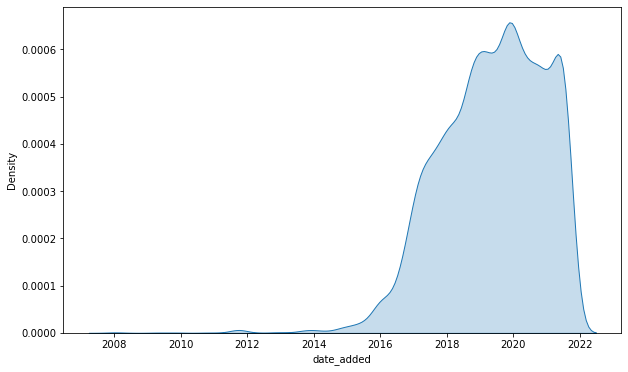

In [9]:
plt.figure(figsize = (10, 6))
sns.kdeplot(data = netflix_data["date_added"], shade = True)

In [10]:
plt.figure(figsize = (10, 6))
fig = px.histogram(netflix_data, x = netflix_data["release_year"])
fig.update_traces(xbins_size=0.5, selector=dict(type='histogram'))
print("Don't forget to interact by hovering over the graph")
fig.show()

Don't forget to interact by hovering over the graph


<Figure size 720x432 with 0 Axes>

## Conclusion :
### Netflix added and released most tv shows and movies in recent years (max in the year 2018)!

We can also see there is one tv show released in the year 1925

In [11]:
netflix_data[netflix_data["release_year"] == 1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


## Dealing with the Months
### Creating another column dedicated to months


In [12]:
netflix_data["date_added_month"] = netflix_data["date_added"].dt.month.fillna(0)
netflix_data["date_added_month"]

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8802    11.0
8803     7.0
8804    11.0
8805     1.0
8806     3.0
Name: date_added_month, Length: 8807, dtype: float64

## Checking if there is any pattern to discover within the Months

In [13]:
px.histogram(netflix_data, x = netflix_data["date_added_month"], color = "date_added_month")

### There is no real pattern to discover here.

## Checking if there is any pattern to discover within the dates

In [14]:
netflix_data["date_added_day"] = netflix_data["date_added"].dt.day.fillna(0)
netflix_data["date_added_day"]

0       25.0
1       24.0
2       24.0
3       24.0
4       24.0
        ... 
8802    20.0
8803     1.0
8804     1.0
8805    11.0
8806     2.0
Name: date_added_day, Length: 8807, dtype: float64

In [15]:
px.histogram(netflix_data, x = netflix_data["date_added_day"])

### So, Netflix adds most on the first day of the month

<a id="section-four"></a>
# Exploring the Type

In [16]:
print(netflix_data["type"].unique())

['Movie' 'TV Show']


In [17]:
fig = px.histogram(netflix_data, x = netflix_data["release_year"], color = "type")
fig.update_traces(xbins_size=0.5, selector=dict(type='histogram'))
fig.show()

### The left side of the graph shows that the movies count is much higher than tv shows count.
### But if we hover over the rightmost bar, we can see that the tv shows count is higher than the movies count.

<AxesSubplot:xlabel='type', ylabel='count'>

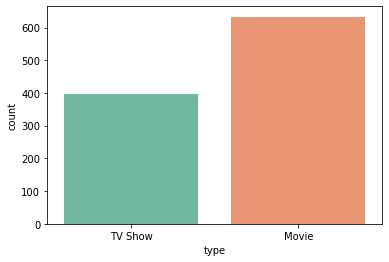

In [18]:
sns.countplot(x="type", data=netflix_data[netflix_data["release_year"] == 2019], palette = "Set2")

<AxesSubplot:xlabel='type', ylabel='count'>

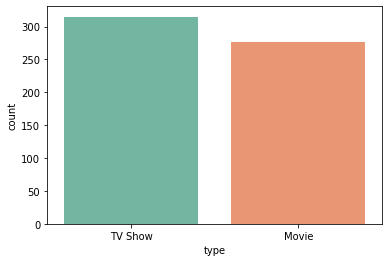

In [19]:
sns.countplot(x="type", data=netflix_data[netflix_data["release_year"] == 2021], palette = "Set2")

<AxesSubplot:xlabel='rating', ylabel='count'>

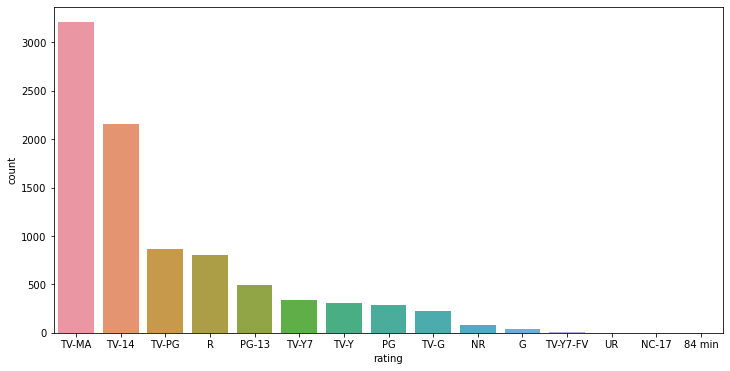

In [20]:
plt.figure(figsize = (12, 6))
sns.countplot(x="rating", data=netflix_data, order=netflix_data['rating'].value_counts().index[0:15])

<a id="section-five"></a>
# Analyzing the countries

In [21]:
# cleaning the data to give each countries one credit for one movie or tv show
country_count = netflix_data.copy()
country_count = pd.concat([country_count, netflix_data["country"].str.split(",", expand = True)], axis = 1)
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country_credit")
country_count = country_count[country_count["country_credit"].notna()] # removing nan
country_count["country_credit"] = country_count["country_credit"].str.strip()
country_count

,type,title,variable,country_credit
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [22]:
px.histogram(country_count, "country_credit", color = "type").update_xaxes(categoryorder = "total descending")

### So most of the Movies and TV Shows are from US, India and UK.
### Also, countries like Japan and South Korea produces more TV Shows as compared to Movies.

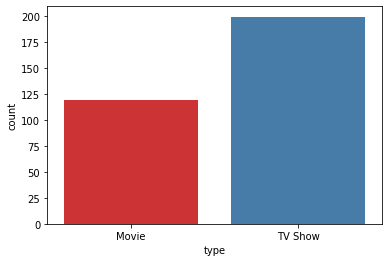

In [23]:
fig1 = sns.countplot(x="type", data = country_count[country_count["country_credit"] == "Japan"], palette = "Set1")

<AxesSubplot:xlabel='type', ylabel='count'>

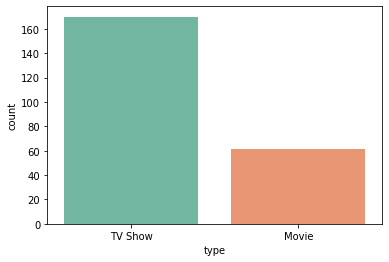

In [24]:
sns.countplot(x="type", data = country_count[country_count["country_credit"] == "South Korea"], palette = "Set2")

## This is my EDA. Thank you!
### Be easy on me as I'm just starting out my Data Science journey. ✌️